# Introduction

Mohammad sent me a [really promising document](https://repository.asu.edu/attachments/94111/content//tmp/package-qKYqYB/Mott_asu_0010E_12173.pdf) which is a dissertation by Adam J. Mott and approved and published in 2012. Mott discusses how the intensities can be calculated, using either dipole moments or charges as well as the connection between the two models.

In the first part of this notebook I will try to derive the charge based model from the dipole model using the equations in Mott's dissertation. In the second part I will use a modified version of my [first script](https://nbviewer.jupyter.org/github/dspoel/IR-Spectra/blob/master/scripts/visualization_of_spectra.ipynb) to calculate the intensities for N-methylacetamide as this molecule is already present as an example in the GitHub repository and Mott also calculated the same force field IR spectrum.

# The variables


Before we start there are some variables that I would like to present to you to make it a lot easier to follow the derivation below. Please return to this table if you are unsure about any of the variables or, if you are really interested, read Mott's dissertation for a more thorough explanation.

(Sorry that the table text is right-aligned. It's a parsing error in Jupyter notebook)

| Variable      | Description    | 
|:--------------|:---------------|
| $A$           | matrix whose columns are the normalized eigenvectors |
| $A_{I,n}$     | element of the $n$th normal mode eigenvector corresponding to the $i$th atom and in direction $k$ |
| $e_i$         | atomic charge of the $i$th atom |
| $H$           | Hessian matrix |
| $I$ (or $J$)  | refering to atom $i$ (or $j$) and its direction $k$ (or $l$) (NOTE: not to be confused with $I_{n}$) |
| $I_{n}$       | intensity of the $n$th vibrational mode (NOTE: not to be confused with $I$) |
| $i$ (or $j$)  | atom, as in the $i$th (or $j$th) atom |
| $k$ (or $l$)  | direction (dimension), as in $x$, $y$ or $z$ direction |
| $m_{i}$       | mass of $i$th atom |
| $N$           | number of atoms in molecule |
| $n$           | number of atomic coordinates, i.e. $3N$ |
| $p_{k}$       | dipole moment in direction k |
| $Q_{n}$       | normal coordinates, defined by the normal mode eigenvectors such that: <br> $Q=A^{T}q$ <br> Or the reverse: <br> $q=AQ$|
| $q_{n}$       | mass-weighted atomic displacements, e.g. <br> $q_{1} = \sqrt{m_{1}}\Delta x_{1}$ <br> $q_{2} = \sqrt{m_{1}}\Delta y_{1}$ <br> $q_{3} = \sqrt{m_{1}}\Delta z_{1}$ <br> $q_{4} = \sqrt{m_{2}}\Delta x_{2}$ <br> etc.|
| $x_{i}$, $y_{i}$, $z_{i}$| Cartesian coordinates |
| $\Delta x_{i}$,$\Delta y_{i}$,$\Delta z_{i}$ | atomic displacements of $i$th atom in $x$, $y$ and $z$ direction respectively in terms of Cartesian coordinates|

# Part 1 - the charge based model

When we run GROMACS and calculate the Hessian matrix $H$, the atomic displacements are mass-weighted. This means that GROMACS divides the elements $H_{ij}$ by the product $\sqrt{m_{i}}\sqrt{m_{j}}$ prior to diagonalization. The conversion for each atomic displacement can also be described with the following relations:

$$
\begin{equation}
q_{1} = \sqrt{m_{1}}\Delta x_{1} \\
q_{2} = \sqrt{m_{1}}\Delta y_{1} \\
q_{3} = \sqrt{m_{1}}\Delta z_{1} \\
q_{4} = \sqrt{m_{2}}\Delta x_{2} \\
q_{5} = \sqrt{m_{2}}\Delta y_{2} \\
q_{6} = \sqrt{m_{2}}\Delta z_{2} \\
\vdots \\
q_{n-2} = \sqrt{m_{N}}\Delta x_{N} \\
q_{n-1} = \sqrt{m_{N}}\Delta y_{N} \\
q_{n} = \sqrt{m_{N}}\Delta z_{N} \\
\tag{1}
\end{equation}
$$

where $n=3N$ and $N$ is the number of atoms in the molecule. When mass-weighting is used, the generated eigenvectors will be scaled back to plain Cartesian coordinates before generating the output. This will be relevant later on, as the formulas in Mott's dissertation assumes that the eigenvectors are normalized. After doing normal-mode analysis, we can produce an $n$-by-$n$ matrix $A$ whose columns are the normalized, eigenvectors of $H$. The normal-mode eigenvectors may be used to define a new set of coordinates called the normal coordinates, $Q_{1}$, $Q_{2}$, ... , $Q_{3N}$ using the following relation:

$$
\begin{equation}
Q=A^{T}q
\tag{2}
\end{equation}
$$

As $A$ consists of the normalized eigenvectors and $A^{T}A = A^{-1}A = I$ (i.e. the identity matrix), conversion back to mass-weighted displacements can be done using:

$$
\begin{equation}
q=AQ
\tag{3}
\end{equation}
$$

If $e_{i}$ is the charge of the $i$th atom, $A_{I,n}$ is the element of the $n$th normal mode eigenvector corresponding to the $i$th atom and in direction $k$, and $m_{i}$ is the mass of the $i$th atom, then the intensity for the $n$th normal mode can be calculated as follows:

$$
\begin{equation}
I_{n}=\sum_{k=l=1}^{3}\sum_{i=1}^{N}\sum_{j=1}^{N} \frac{e_{i}A_{I,n}A_{J,n}e_{j}}{\sqrt{m_{i}}\sqrt{m_{j}}}
\tag{4}
\end{equation}
$$

So, how did Mott come up with this formula that is based on the atomic charges and the values of the eigenvectors instead of the dipole moment? Let us start by looking at differential part the dipole moment formula:

$$
\begin{equation}
I_{n} \propto \left|\frac{\partial p}{\partial Q_{n}}\right|^2 = \sum_{k=1}^{3}\left(\frac{\partial p_{k}}{\partial Q_{n}}\right)^2
\tag{5}
\end{equation}
$$

where $p$ is the dipole moment and $Q$ is the normal coordinates. Please note that $k$ denotes the Cartesian directions where 1, 2, and 3 corresponds to $x$, $y$, and $z$ respectively. We can then expand the fraction in $(5)$ by using the chain rule:

$$
\begin{equation}
\frac{\partial p_{k}}{\partial Q_{n}} = \sum_{i=1}^{N}\frac{\partial p_{k}}{\partial q_{I}}\frac{\partial q_{I}}{\partial Q_{n}}
\tag{6}
\end{equation}
$$

We can then write each of the original coordinates, $q_{I}$, in terms of the $3N$ coordinates as:

$$
\begin{equation}
q_{I} = \frac{\partial q_{I}}{\partial Q_{1}}Q_{1}+\frac{\partial q_{I}}{\partial Q_{2}}Q_{2} + ... + \frac{\partial q_{I}}{\partial Q_{3N}}Q_{3N}
\tag{7}
\end{equation}
$$

If we compare $(7)$ with $(3)$, we can see that:

$$
\begin{equation}
\frac{\partial q_{I}}{\partial Q_{n}} = A_{I,n}
\tag{8}
\end{equation}
$$

which is the $n$th eigenvector of our Hessian. The contribution to the $k$ component of the molecule’s dipole moment by displacement $q_{I}$ of atom $i$ (mass $m_{i}$, charge $e_{i}$) is given by $e_{i}q_{I}/m_{i}$, where dividing by the square root of the atom’s mass is necessary to convert the mass-weighted coordinate $q_{I}$ back into an ordinary Cartesian displacement. This gives us:

$$
\begin{equation}
\frac{\partial p_{k}}{\partial q_{I}} = \frac{e_{i}}{\sqrt{m_{i}}}
\tag{9}
\end{equation}
$$

Now, inserting $(8)$ and $(9)$ into $(6)$ we get:

$$
\begin{equation}
\frac{\partial p_{k}}{\partial Q_{n}} = \sum_{i=1}^{N}\frac{e_{i}}{\sqrt{m_{i}}}A_{I,n}
\tag{10}
\end{equation}
$$

We can then insert $(10)$ into $(5)$:

$$
\begin{equation}
I_{n} \propto \sum_{k=1}^{3}\left(\sum_{i=1}^{N}\frac{e_{i}}{\sqrt{m_{i}}}A_{I,n}\right)^2
\tag{11}
\end{equation}
$$

And by expanding the squared expression we can derive the last two sums of $(4)$:

$$
\begin{equation}
\left(\sum_{i=1}^{N}\frac{e_{i}}{\sqrt{m_{i}}}A_{I,n}\right)^2 = \left(\sum_{i=1}^{N}\frac{e_{i}}{\sqrt{m_{i}}}A_{I,n}\right)\left(\sum_{j=1}^{N}\frac{e_{j}}{\sqrt{m_{j}}}A_{J,n}\right) = \sum_{i=1}^{N}\sum_{j=1}^{N} \frac{e_{i}A_{I,n}A_{J,n}e_{j}}{\sqrt{m_{i}}\sqrt{m_{j}}}
\tag{12}
\end{equation}
$$

with renamed indices $j$ and $J$ (with $l = k$  in the relations $I = 3(i − 1) + k$ and $J = 3(j − 1) + l$) for the second sum, which establishes the equivalence between calculating the IR intensities based on the dipole derivatives (Eq. $(5)$ and $(11)$) and Eq. $(4)$, i.e. we no longer have a proportionality between the two sides. Observe that the left hand side is computationally more efficient to compute than the right hand side. By inserting $(12)$ into $(4)$ we get the following equation:

$$
\begin{equation}
I_{n}=\sum_{k=1}^{3}\left(\sum_{i=1}^{N}\frac{e_{i}}{\sqrt{m_{i}}}A_{I,n}\right)^2
\tag{13}
\end{equation}
$$

# Part 2 - calculating the intensities for N-methylacetamide

First of all, we need to import the relevant libraries for the visualization:

In [1]:
import numpy as np
from numpy import linalg as LA
import re
import subprocess as sp
import math
import matplotlib.pyplot as plt

## Read data from GROMACS files

We need to read all the required GROMACS files to calculate the intensities. We need the following:
* Eigenfrequencies $v$ (eigenfreq.xvg)
* Eigenvectors $A_{I}$ (eigenvec.trr)
* Atomic charge mass factors $\frac{e_{i}}{\sqrt{m_{i}}}$  (topol.top)


In [3]:
def extract_gmx_data(path):
    # eigenfrequencies
    eigenfrequencies = []
    eigenfrequency_file = open(path + "eigenfreq.xvg", "r")
    for line in eigenfrequency_file:
        if line[0] != "@" and line[0] != "#":
            split_line = re.split(" +",line.strip())
            eigenfrequencies.append(float(split_line[1]))

    # eigenvectors - NOTE: eigenvectors will be Nx3, not 3Nx1 as they are already ordered w.r.t. dimensions x, y, z
    eigenvectors = []
    current_eigenvector = []
    sp.run("/usr/local/gromacs/bin/gmx_d dump -f " + path + "eigenvec.trr > " + path + "eigenvec.txt",shell=True)
    eigenvector_file = open(path + "eigenvec.txt", "r")
    sp.run("rm " + path + "eigenvec.txt",shell=True)
    first_vector_found = False 
    vector_found = False
    for line in eigenvector_file:
        line = line.strip()
        if line[0:3] == "x (" and not first_vector_found:
            first_vector_found = True
        elif line[0:3] == "x (" and first_vector_found and not vector_found:
            vector_found = True
        elif line[0:2] == "x[" and first_vector_found and vector_found:
            values = re.split("[{},]",line)
            current_eigenvector.append([float(values[1]),float(values[2]),float(values[3])])
        elif vector_found and first_vector_found:
            eigenvectors.append(current_eigenvector)
            current_eigenvector = []
            vector_found = False
    eigenvectors.append(current_eigenvector) # don't forget to add the last eigenvector!
    eigenvectors = np.asarray(eigenvectors)

    # charges and mass factors
    masses = []
    charge_mass_factors = []
    topol_file = open(path + "topol.top", "r")
    currently_at_properties = False
    header_skipped = False
    for line in topol_file:
        line = line.strip()
        if currently_at_properties and len(line) == 0:
            currently_at_properties = False
        elif currently_at_properties and header_skipped:
            split_line = re.split(" +",line.strip())
            masses.append(float(split_line[7]))
            charge_mass_factors.append(float(split_line[6])/math.sqrt(float(split_line[7])))
        elif currently_at_properties:
            header_skipped = True
        elif "[ atoms ]" in line:
            currently_at_properties = True
    charge_mass_factors = np.asarray(charge_mass_factors)
    
    # reverse GROMACS eigenvector scaling and normalize the eigenvectors
    for eigenvector in eigenvectors:
        for i in range(np.size(eigenvector,0)):
            eigenvector[i,:] = eigenvector[i,:]*math.sqrt(masses[i])
        eigenvector = eigenvector/LA.norm(eigenvector)
        
    return eigenfrequencies, eigenvectors, charge_mass_factors

## Calculate intensities

We are now ready to calculate the intensities based on formula (13), i.e. $$I_{n}=\sum_{k=1}^{3}\left(\sum_{i=1}^{N}\frac{e_{i}}{\sqrt{m_{i}}}A_{I,n}\right)^2$$.

In [4]:
molecule_of_interest = "N-methylacetamide" # <--- feel free to change to other examples in the GitHub repository
path = "../examples/CGenFF/" + molecule_of_interest + "/"

eigfreq, eigvec, cmf = extract_gmx_data(path)

intensities = []
# iterate over eigenvectors
for n in range(np.size(eigvec,0)):
    intensity = 0
    # iterate over dimensions
    for k in range(3):
        intensity = intensity + (cmf.dot(eigvec[n][:,k]))**2
    intensities.append(intensity)

## Plot spectrum

To plot the spectra, we need a cauchy distribution function. Let's define it:

In [5]:
def create_cauchy_distribution(v,v0,gamma,I):
    # v     - NumPy array with points on x-axis (can be generated using e.g. 'np.linspace(1,4000,4000)')
    # v0    - eigenfrequency aka median (not mean!) of distribution
    # gamma - FWHM aka scale of distribution
    # I     - intensity
    c = np.zeros(len(v))
    for i in range(len(v)):
        c[i] = I*(1/math.pi)*(((1/2)*gamma)/((v[i]-v0)**2+((1/2)*gamma)**2))
    return c

And now, lets plot!

Text(0.5, 0, 'Frequency, $cm^{-1}$')

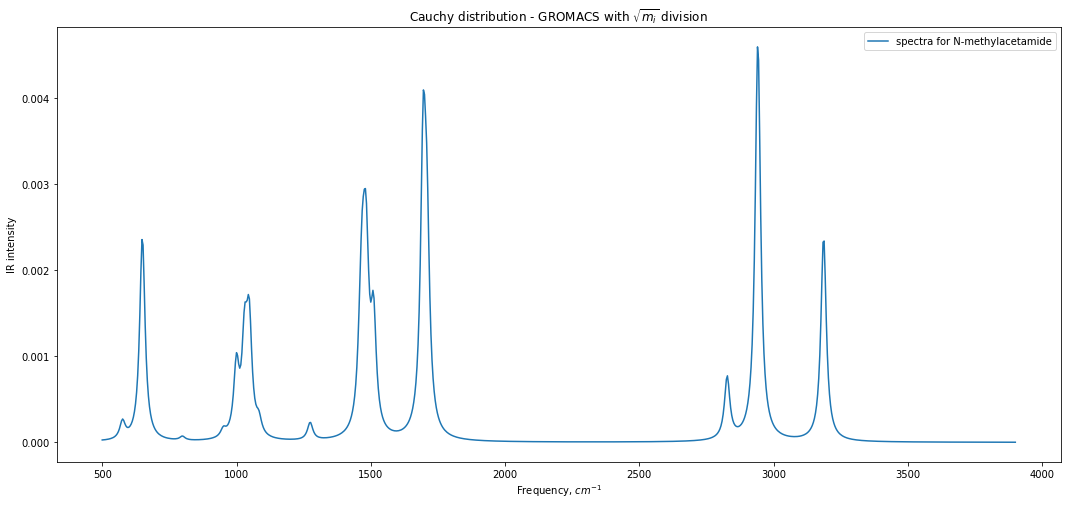

In [6]:
start_freq = 500
stop_freq = 3900
step_size = 4

v = np.linspace(start_freq,stop_freq,int((stop_freq-start_freq)/step_size)+1)
c_tot = np.zeros(len(v))

# Set gamma (FWHM); Mott used 24 cm⁻¹
gamma = 24

# Is the molecule linear?
molecule_is_linear = False # <--- change this to specify whether the molecule is linear or not
if molecule_is_linear:
    no_of_non_vibrational = 5
else:
    no_of_non_vibrational = 6

# plot with mass factor
plt.figure(figsize=(18, 8))
for i in range(no_of_non_vibrational,len(eigfreq)):
    c = create_cauchy_distribution(v,eigfreq[i],gamma,intensities[i])
    c_tot = c_tot + c
plt.plot(v,c_tot,label='spectra for ' + molecule_of_interest)
plt.title("Cauchy distribution - GROMACS with $\sqrt{m_{i}}$ division")
plt.legend(loc='upper right')
plt.ylabel('IR intensity')
plt.xlabel('Frequency, $cm^{-1}$')

## Looking at the OEP-3 for comparison

Text(0.5, 0, 'Frequency, $cm^{-1}$')

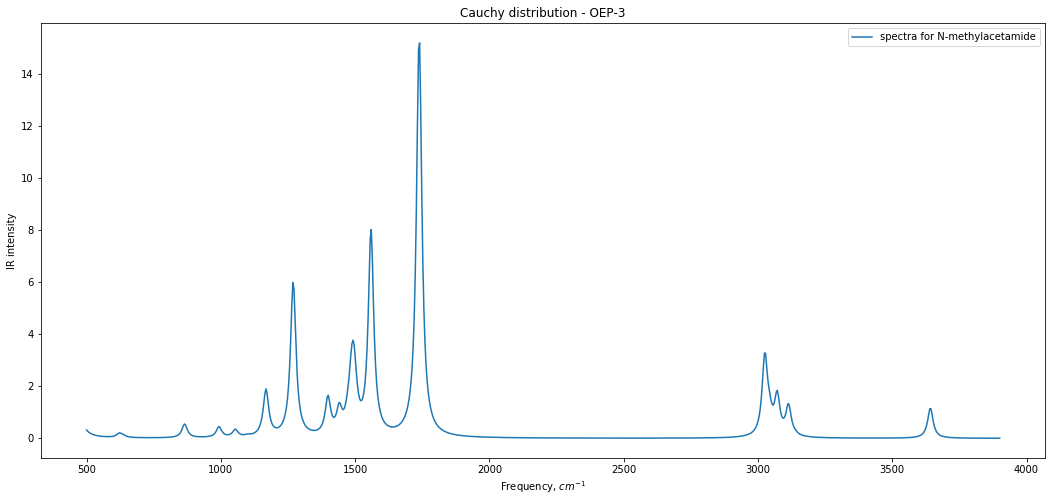

In [7]:
frequencies_oep3 = np.empty(shape=(0,0))
frequencies_oep3_file = open(path + "OEP-3_IR_frequencies.txt","r")
for line in frequencies_oep3_file:
    values = re.split(" +",line.strip())
    for value in values:
        frequencies_oep3 = np.append(frequencies_oep3,float(value))

intensities_oep3 = np.empty(shape=(0,0))
intensities_oep3_file = open(path + "OEP-3_IR_intensities.txt","r")
for line in intensities_oep3_file:
    values = re.split(" +",line.strip())
    for value in values:
        intensities_oep3 = np.append(intensities_oep3,float(value))
        
plt.figure(figsize=(18, 8))
for i in range(len(frequencies_oep3)):
    c = create_cauchy_distribution(v,frequencies_oep3[i],gamma,intensities_oep3[i])
    c_tot = c_tot + c
plt.plot(v,c_tot,label='spectra for ' + molecule_of_interest)
plt.title("Cauchy distribution - OEP-3")
plt.legend(loc='upper right')
plt.ylabel('IR intensity')
plt.xlabel('Frequency, $cm^{-1}$')
    